## Исследование данных о российском кинопрокате



**Цель проекта**
* Выявить тренды российского рынка кинопроката 
* Изучить из всех фильмы, получившие государственную поддержку

**Описание входных данных**

* title — название фильма
* puNumber — номер прокатного удостоверения
* show_start_date — дата премьеры фильма
* type — тип фильма
* film_studio — студия-производитель
* production_country — страна-производитель
* director — режиссёр
* producer — продюсер
* age_restriction — возрастная категория
* refundable_support — объём возвратных средств государственной поддержки
* nonrefundable_support — объём невозвратных средств государственной поддержки
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма
* ratings — рейтинг фильма на КиноПоиске
* genres — жанр фильма
* box_office — сборы в рублях.

**План работы**
* Просмотр и изучение данных
* Предобработка данных
* Иследовательский анализ данных
* Общий вывод

### 1. Объектный осмотр данных:

P.S. **Слияние датасетов будет на этапе 2, вместе с приведением типа значений**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
print('Размер первого датасета:',data1.shape)
print('Размер второго датасета:', data2.shape)

Размер первого датасета: (7486, 15)
Размер второго датасета: (3158, 2)


In [4]:
#Просмотрим составляющие датасетов
display(data1.head())
display(data2.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


**Есть дубли в названиях фильма, но они разнятся по старту показа**

In [5]:
#Основная информация по датасетам
print('Все столбцы первого датасета:', data1.columns, '\n')
print(data1.info(), '\n')
print('Все столбцы второго датасета:',data2.columns,'\n')
print(data2.info())

Все столбцы первого датасета: Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refunda

In [6]:
#Смотрим явные дубликаты
print('Дубликаты в data1:', data1.duplicated().sum(), '\n')
print('Дубликаты в data2:', data2.duplicated().sum(), '\n')
# смотрим отсутствия значений
print(data1.isna().sum(), '\n')
print(data2.isna().sum())

Дубликаты в data1: 0 

Дубликаты в data2: 0 

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64 

puNumber      0
box_office    0
dtype: int64


In [7]:
#В первом просмотре нам попалось 3 одинаковых названия фильма, проверим это:
data1['title'].duplicated().sum()

714

**Некоторые фильмы поступали в прокат более одного раза**

In [8]:
#Смотрим уникальные значения в типе фильма.
print('type:', data1['type'].unique(),'\n')
# Отсортируем значения puNumber, чтобы отделить цифровые objects от текста. Это поможет найти странные значения.
print('puNumber:','\n', data1['puNumber'].sort_values(ascending = False).head(5),'\n')
#смотрим текстовые ошибки в возростном ограничении.
print(data1['age_restriction'].unique(),'\n')
# ratings, смотрим отличия от float( начало и конец должны быть идентичны.)
print('ratings:','\n', data1['ratings'].sort_values(ascending = False).head(2),'\n')
print('ratings:','\n', data1['ratings'].sort_values(ascending = True).head(2))


type: ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный'] 

puNumber: 
 1797          нет
5249    231001111
1011    231001012
3992    226019110
4355    226017410
Name: puNumber, dtype: object 

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории'] 

ratings: 
 6882    99%
259     99%
Name: ratings, dtype: object 

ratings: 
 3515    1.0
4678    1.1
Name: ratings, dtype: object


* Выявлены неявные дубли.
* Просмотрим процентные значения, и 'нет' в номере.  Тут явные вопросы

In [9]:
display(data1[data1['ratings'] == '99%'])
display(data1[data1['puNumber'] == 'нет'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
259,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма"
1341,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив"
1805,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы"
6882,Животные рядом со Святыми,112003719,2019-05-03T12:00:00.000Z,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,99%,"криминал,драма"


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


# Вывод по быстрому предпросмотру:

* **Логическая замена % на цифровой рейтинг фильма невозможна ввиду отсутствия закономерностей.** 
* **Фильм 'Прошлое' не имет в своей статистике(Данные с кинопоиска) значений в 99%, рейтинг 6.7, а положительные рецензии только 43%.**
* **'Спираль' А.Волгина 2014 года совсем никак не относится к указанным жанрам, и 99% рейтинга нигде не указано. Сразу всплывает вопрос о том, как собирались данные, т.к. Спираль подходящая под такие жанры может быть только произведением мангаки Дзёнси Ито и никак не корелирует с боевиком А.Волгина.**
* **Похожие проблемы наблюдаются и в других фильмах с %'ным показанием рейтинга. Предположительно - это рейтинг ожидания, что никак не влияет на итоговый результат в форме рейтинга-оценки.**
* **(Есть сомнения в качестве dataset'a)**

* **Есть большое количество пропусков в количественных столбцах**
* **Так же, проверка значений требуется категориальным данным, как минимум на наличие неявных дублей.**


### 2. Предобработка данных и слияние data

#### 2.1. Проверка типов данных:


In [10]:
#Принимаем решение привести puNumber к категориальному значению objects в data2
#Т.к. нас не интересуют математические операции с категориальным значением.

data2['puNumber'] = data2['puNumber'].astype(str)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [11]:
# Объединяем dataframe data1 и data2 в один, сохраняя все значения data1
data = data1.merge(data2, on = 'puNumber', how = 'left')


In [12]:
print('Объем данных до слияния:', data1.shape)
print('Известных данных в box_ofiice до слияния:', data2['box_office'].notna().sum())
print('Объем данных после слияния:',data.shape)
print('Известных данных в box_ofiice после слияния:', data['box_office'].notna().sum())

Объем данных до слияния: (7486, 15)
Известных данных в box_ofiice до слияния: 3158
Объем данных после слияния: (7486, 16)
Известных данных в box_ofiice после слияния: 3158


In [13]:
def forna(row):
    try:
        if '%' in row:
            return np.nan
        else:
            return row
    except:
        return row

**Т.к. процентные значения показали свою необъективность и дальнейшее их использование не планируется - пишем функцию для замены значенй на 'nan'.**

In [14]:
display(data['ratings'].notna().sum())
data['ratings'] = data['ratings'].apply(forna)

6519

In [15]:
display(data['ratings'].notna().sum())

6490

In [16]:
#Меняем тип данных в столбце с рейтингом.
data['ratings'] = data['ratings'].astype(float)

In [17]:
#Меняем тип данных для Datetime из 2013-01-17T12:00:00.000Z
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y.%m.%dT%H:%M:%S.%f')


####  2.2. Обзор пропусков в data


In [18]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [19]:
#заполним пропуски в категориальных значениях, как неизветные
data['genres'].fillna('unknow', inplace = True)
data['director'].fillna('unknow', inplace = True)
data['producer'].fillna('unknow', inplace = True)
data['production_country'].fillna('unknow', inplace = True)
data['film_studio'].fillna('unknow', inplace = True)
data['producer'].fillna('unknow', inplace = True)

####  2.3. Изучение дубликатов:


In [20]:
#Посмотрим все дубликаты в каждом из столбцов поотдельности

for column in data.columns:
    print(column, data[column].duplicated().sum())
# Посмотрим сколько полностью одинаковых строк

print('\n','повторов строк:',data.duplicated().sum())

title 714
puNumber 2
show_start_date 5521
type 7478
film_studio 1995
production_country 6535
director 2674
producer 2136
age_restriction 7481
refundable_support 7451
nonrefundable_support 7410
budget 7195
financing_source 7482
ratings 7405
genres 6743
box_office 4547

 повторов строк: 0


In [21]:
#Обрабатываем неявные дубликаты в категориальных данных
print('before :', data['type'].unique())

data['type'] = data['type'].str.strip()
print('\n', 'after :', data['type'].unique())

before : ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']

 after : ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


In [22]:
print('before :',data['production_country'].unique())

# вопросы к разделению стран в значениях больше одной
#страны разделены запятой или тире

#заменяем тире
data['production_country'] = data['production_country'].str.replace('-',',')
#удаляем лишний символ в одном из названий
data['production_country'] = data['production_country'].str.replace(';','')
data['production_country'] = data['production_country'].replace('Ю.Корея','Южная Корея')
#подводим запятые под общий вид
data['production_country'].str.strip()
data['production_country'] = data['production_country'].str.replace(',',', ')


print('\n','after:', data['production_country'].unique())

before : ['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Великобритания - Че

In [23]:
print(data['age_restriction'].unique())
# Тут и так понятно с возрастными ограничениями, заменим на более простые
# труда не составит, а выглядит гармонично 
data['age_restriction'] = data['age_restriction'].replace('«18+» - запрещено для детей','18+')
data['age_restriction'] = data['age_restriction'].replace('«16+» - для детей старше 16 лет','16+')
data['age_restriction'] = data['age_restriction'].replace('«12+» - для детей старше 12 лет','12+')
data['age_restriction'] = data['age_restriction'].replace('«6+» - для детей старше 6 лет','6+')
data['age_restriction'] = data['age_restriction'].replace('«0+» - для любой зрительской аудитории','0+')
print(data['age_restriction'].unique())

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']
['18+' '6+' '12+' '16+' '0+']


In [24]:
print(data['producer'].unique())
print(data['genres'].unique())
#Предупредим возможные проблемы в категории жанров
data['genres'].str.strip()
print(data['director'].unique())

['Дэвид Валдес, Кевин Костнер, Джейк Эбертс' 'unknow'
 'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит' ...
 'Поппи Бегум, Ник Пойнц'
 'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу'
 'Дженнифер Додж']
['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'
 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'
 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'
 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'
 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'
 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'
 'драма,комедия' 'ужасы,фантастика,комедия'
 'мультфильм,короткометражка,мелодрама' 'драма,криминал'
 'мультфильм,фантастика,фэнтези' 'триллер,драма,криминал'
 'драма,мелодрама,биография' 'драма,комедия,военный'
 'фантастика,драма,детектив' 'мюзикл,семейный' 'unknow'
 'военный,приключения,драма' 'документальный,драма'
 'драма,биография,история' 'боевик,триллер,д

**Виной ошибок в категориальных столбцах могуть быть отсутствие стандартов для заполнения и человеческий фактор.**

Названия фильмов:

In [25]:
# Просмотр дублей с их первообразными и счёт количества без учета первообразной 
display(data[data['title'].duplicated(keep = False) == True].sort_values('title'))
print(data['title'].duplicated().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,16+,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,16+,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...","США , Великобритания",Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",16+,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...","США , Великобритания",Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",16+,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",18+,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",16+,NaN,NaN,NaN,NaN,5.00,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...","Франция , Бельгия",Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",16+,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...","Франция , Бельгия",Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",16+,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,unknow,Россия,Е.Окопная,Е.Герасимов,12+,NaN,NaN,NaN,NaN,NaN,unknow,NaN


714


Дубликатов очень много. Есть фильмы с разными датами релиза, есть с одинаковыми, но разными номерами прокатных удостоверений.

Проверим, что они из себя представляют:

In [26]:
#Ищем дубли с заполнеными значениями в интересующих нас столбцах
display(data[(data['title'].duplicated(keep = False) == True) & ((data['refundable_support'] > 0)|(data['nonrefundable_support']>0))]\
        [['title','refundable_support','nonrefundable_support']])

,title,refundable_support,nonrefundable_support
3614,Три сестры,0.00,"25,000,000.00"
5829,Прощаться не будем,0.00,"35,000,000.00"
6898,Мысленный волк,0.00,"30,000,000.00"
7322,Успех,"5,000,000.00","20,000,000.00"
7474,Вторжение,"100,000,000.00","400,000,000.00"


Отсутствие в выводе дублей позволяет утверждать, что данные о гос.помощи заполненый только в одном случае, на все дубли.

In [27]:
# прооверим утверждение выше:
display(data[data['title'] == 'Мысленный волк'][['title','refundable_support','nonrefundable_support','box_office']])

,title,refundable_support,nonrefundable_support,box_office
6488,Мысленный волк,NaN,NaN,NaN
6898,Мысленный волк,0.00,"30,000,000.00","2,258,384.00"


In [28]:
# Смотрим дубли с разными охватами сборов охватом сборов
display(data[(data['title'].duplicated() == True) & (data['box_office'] > 0)].sort_values('title').head(2))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",18+,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма","18,439,240.55"
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...","Франция, Канада",Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",16+,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",750.00


Всего два фильма из известных дублей имеют показатель кассового сбора в обоих случаях 

Посмотрим распределение дублей фильмов по году. 

In [29]:
#Выводим дату релиза
data['release'] = data['show_start_date'].dt.year
data['release'] = data['release'].astype('Int64')
print(data['release'])

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: release, Length: 7486, dtype: Int64


In [30]:
#строим таблицу с распределением дубликатов по годам
sort_data = data[data['title'].duplicated() == True].sort_values('title')
sort_data.pivot_table(index = 'release', values = 'title', aggfunc = 'count')

,title
release,
2010,223
2011,145
2012,76
2013,40
2014,77
2015,44
2016,47
2017,7
2018,16


* **За исключением 2010 года, строки с одинаковыми названиями фильмов попадаются сравнительно часто, они имеют разные даты релиза как и уникальный идентификатор, т.е. - это либо продление, либо перезапуск показа, зависит от обстоятельств.**
* **Строк с такими дублями много и они составляют значительный объем данных от общего количества, в дальнейшей статистике они будут считаться как отдельный фильм, со своим успехом в прокате т.к. кассовый сбор у таких релизов - различный и они никак не повлияют на дальнейшую статистику.**

Дубли в номере:

In [31]:
print(data['puNumber'].duplicated().sum())

2


In [32]:
display(data[data['puNumber'].duplicated(keep = False) == True].sort_values('puNumber'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД","США, Австралия",ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16+,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN,2010
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN,2010
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",16+,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN,2010
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...","Германия , Великобритания , Италия , Испания",Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16+,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN,2010


* **Первые два фильма - приквел и сиквел, которые не являются премьерами и вышли в 2000-ых, вторые дубли - не связаны, просто имеют одинаковый номер в прокате.**
* **Дроп этих значений никак не отразиться на дальнейшей работе**

In [33]:
#удаляем дубли в номере 
data = data.drop_duplicates(subset = ['puNumber'])
print(data['puNumber'].duplicated().sum())

0


#### 2.4. Обзор количественных значений

AxesSubplot(0.125,0.125;0.775x0.755)


count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64


 Максимальные объемы возвратных средств:
7114   180,000,000.00
3351   150,000,000.00
6472   115,000,000.00
5437   110,000,000.00
3164   110,000,000.00
Name: refundable_support, dtype: float64

 Минимальные объемы возвратных средств:
1281   0.00
5600   0.00
5609   0.00
Name: refundable_support, dtype: float64


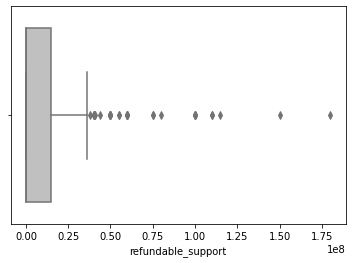

In [34]:
print(sns.boxplot(x = 'refundable_support', data = data, color = 'silver'))
display(data['refundable_support'].describe())

print('\n', 'Максимальные объемы возвратных средств:')
print(data['refundable_support'].sort_values(ascending = False).head(5))

print('\n', 'Минимальные объемы возвратных средств:')
print(data['refundable_support'].sort_values(ascending = True).head(3))

**Значения не требуют вмешательства**

AxesSubplot(0.125,0.125;0.775x0.755)


count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64


 Максимальные объемы невозвратных средств:
7474   400,000,000.00
7464   400,000,000.00
5653   400,000,000.00
2920   392,104,482.00
6887   300,000,000.00
Name: nonrefundable_support, dtype: float64

 Минимальные объемы невозвратных средств:
6472   0.00
2683   0.00
6627   0.00
Name: nonrefundable_support, dtype: float64


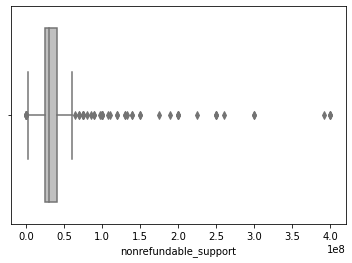

In [35]:
print(sns.boxplot(x = 'nonrefundable_support', data = data, color = 'silver'))
display(data['nonrefundable_support'].describe())

print('\n', 'Максимальные объемы невозвратных средств:')
print(data['nonrefundable_support'].sort_values(ascending = False).head(5))

print('\n', 'Минимальные объемы невозвратных средств:')
print(data['nonrefundable_support'].sort_values(ascending = True).head(3))

**Значения не требуют вмешательства**

AxesSubplot(0.125,0.125;0.775x0.755)


count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64


 Наибольший общий бюджет:
7114   2,305,074,303.00
5437   1,032,905,957.00
7464     980,000,000.00
7474     944,000,000.00
7171     779,941,965.00
Name: budget, dtype: float64

 Наименьший общий бюджет:
2532   0.00
3675   0.00
2874   0.00
Name: budget, dtype: float64


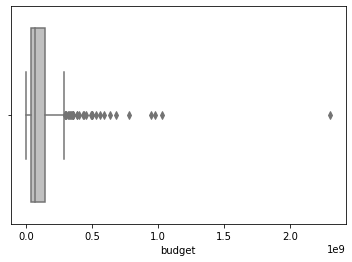

In [36]:
print(sns.boxplot(x = 'budget', data = data, color = 'silver'))
display(data['budget'].describe())

print('\n', 'Наибольший общий бюджет:')
print(data['budget'].sort_values(ascending = False).head(5))

print('\n', 'Наименьший общий бюджет:')
print(data['budget'].sort_values(ascending = True).head(3))

**Нулевым общий бюджет быть не может**

In [37]:
#количество фильмов с нулевым общим бюджетом
print(data[data['budget'] == 0.0]['budget'].count())

17


In [38]:
#Смотрим что из себя представляю строки с нулевым бюджетом:
display(data[data['budget']== 0.0].head(2))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",2014
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",2015


* **В строках с отсутствующим общим бюджетом есть информация о гос.бюджете входящем в него.**
* **Вычислим среднюю долю гос.бюджета в общем бюджете фильма и относительно полученного значения - заполним нули**

In [39]:
print(data['budget'].count())
print(data.shape)
print('Процент данных с нулевым бюджетом:',(17 / 332)*100)

332
(7484, 17)
Процент данных с нулевым бюджетом: 5.120481927710843


**Отсутствующих значений в бюджете около 5%(незначительно) - удалим эти значения, для качества будущего анализа**

In [40]:
data = data.query('budget != 0')
print(data['budget'].count())
print(data.shape)

315
(7467, 17)


In [41]:
#Смотрим новые минимальные значения:
print('\n', 'Наименьший общий бюджет:')
print(data['budget'].sort_values(ascending = True).head(5))


 Наименьший общий бюджет:
3139   14,462,464.00
7042   15,010,000.00
5576   18,166,418.00
3711   18,706,080.00
2663   27,000,000.00
Name: budget, dtype: float64


**Устраивает**

AxesSubplot(0.125,0.125;0.775x0.755)


count   6,472.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64


 Самый высокий рейтинг фильмов:
1471   9.20
7302   9.10
6169   9.00
6172   9.00
7232   8.90
Name: ratings, dtype: float64

 Самый низкий рейтинг фильмов:
3515   1.00
4678   1.10
1535   1.10
Name: ratings, dtype: float64


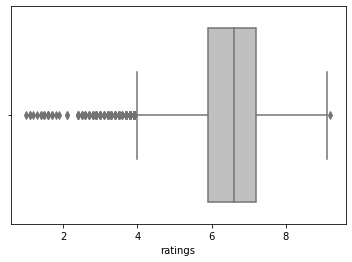

In [42]:
print(sns.boxplot(x = 'ratings', data = data, color = 'silver'))
display(data['ratings'].describe())

print('\n', 'Самый высокий рейтинг фильмов:')
print(data['ratings'].sort_values(ascending = False).head(5))

print('\n', 'Самый низкий рейтинг фильмов:')
print(data['ratings'].sort_values(ascending = True).head(3))

**Странный показатель максимума и минимума рейтинга**

In [43]:
#Смотрим максимумы
display(data[data['ratings'] > 8.8])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release
1471,Друзья друзей,111014513,2013-12-19 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",16+,NaN,NaN,NaN,NaN,9.20,"комедия,мелодрама","27,780.00",2013
6169,"Анимационный фильм ""Малышарики 3"", серия ""Нужн...",114005118,2018-08-27 12:00:00+00:00,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,"И.Попов, Ю.Осетинская",0+,NaN,NaN,NaN,NaN,9.00,"мультфильм,детский,семейный",NaN,2018
6172,"Анимационный фильм ""Малышарики 3"", серия ""Пода...",114005418,2018-08-27 12:00:00+00:00,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,"И.Попов, Ю.Осетинская",0+,NaN,NaN,NaN,NaN,9.00,"мультфильм,детский,семейный",NaN,2018
7232,Форрест Гамп,121026719,2019-10-25 12:00:00+00:00,Художественный,Парамаунт Пикчерз,США,Роберт Земекис,"Венди Файнерман, Стив Старки, Стив Тиш",16+,NaN,NaN,NaN,NaN,8.90,"драма,мелодрама,комедия",NaN,2019
7302,Побег из Шоушенка,121029519,2019-10-18 12:00:00+00:00,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,"Лиз Глоцер, Дэвид В.Лестер, Ники Марвин",16+,NaN,NaN,NaN,NaN,9.10,драма,NaN,2019


In [44]:
#Смотрим минимумы
display(data[data['ratings'] < 1.2])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release
1535,Кавказ.,111009413,2013-11-26 12:00:00+00:00,Художественный,"Юнайтед Мультимедиа Проджектс, Метрополь","Азербайджан, Россия",Фарид Гумбатов,"Рауф Атамалибеков, Фарид Гумбатов",16+,NaN,NaN,NaN,NaN,1.10,комедия,NaN,2013
3515,Взломать блогеров,111016616,2016-10-28 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,6+,0.00,"25,000,000.00","36,016,269.00",Фонд кино,1.00,"комедия,мультфильм,фантастика","7,323,648.00",2016
4678,Мантикора.,111011510,2010-12-17 12:00:00+00:00,Художественный,"ООО ""Студия спецэффектов ""Ацидум""",Россия,Вл.Китт,В.Музыченков,16+,NaN,NaN,NaN,NaN,1.10,триллер,NaN,2010


* **top1 фильм по рейтингу на кинопоиске, на данный момент имеет не 9.2, а 3.3 балла.**
* **Фильмы с конца списка правдоподобны.**
* **В топе фильмов по рейтингу числятся серии анимационных, многосерийных франшиз - для отдельных серий возможны такие показатели рейтинга**
* **Оставляем статистику без изменений, но есть вопрос к качеству сбора данных**

AxesSubplot(0.125,0.125;0.775x0.755)


count           3,141.00
mean       76,009,674.78
std       240,250,266.23
min                 0.00
25%            83,950.00
50%         2,284,862.00
75%        23,441,120.00
max     3,073,568,690.79
Name: box_office, dtype: float64


 Самые большие сборы:
7456   3,073,568,690.79
5653   2,779,686,144.00
6820   2,576,613,776.83
6549   2,271,754,004.52
3488   2,118,396,119.00
Name: box_office, dtype: float64

 Самые низкие сборы:
1559   0.00
932    0.00
2126   0.00
Name: box_office, dtype: float64


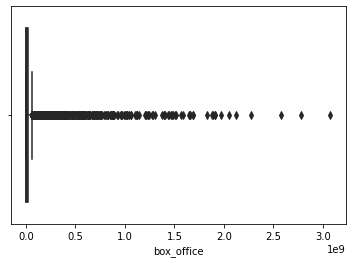

In [45]:
print(sns.boxplot(x = 'box_office', data = data, color = 'green'))
display(data['box_office'].describe())

print('\n', 'Самые большие сборы:')
print(data['box_office'].sort_values(ascending = False).head(5))

print('\n', 'Самые низкие сборы:')
print(data['box_office'].sort_values(ascending = True).head(3))

* **Нулевые и очень маленькие кассовые сборы - выглядят очень сомнительно. В то же время, нужно определиться что делать с этими значениями.**
* **В первом квартиле значения около 86.000, что выглядит маловато**

In [46]:
#Смотрим чемпиона по сборам
display(data.loc[7456])

title                                                                Холоп
puNumber                                                         111021719
show_start_date                                  2019-12-19 12:00:00+00:00
type                                                        Художественный
film_studio                        ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"
production_country                                                  Россия
director                                                         К.Шипенко
producer                 Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...
age_restriction                                                        12+
refundable_support                                           25,000,000.00
nonrefundable_support                                        35,000,000.00
budget                                                      160,000,000.00
financing_source                                                 Фонд кино
ratings                  

* Рекордсмен Российского проката, на месте

In [47]:
# Просмотрим нули по кассовым сборам

print(data[data['box_office'] == 0.0]['box_office'].count())
display(data[data['box_office'] == 0.0].head(2))

24


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,unknow,6+,NaN,NaN,NaN,NaN,7.70,"драма,биография,музыка",0.00,2013
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknow,12+,NaN,NaN,NaN,NaN,8.20,драма,0.00,2013


In [48]:
print('Процент аномальных кассовых сборов:',\
(data[data['box_office'] == 0]['box_office'].count()/data[data['box_office']>0]['box_office'].count())*100, '%')
data.shape

Процент аномальных кассовых сборов: 0.769971126082772 %


(7467, 17)

In [49]:
data = data.query('box_office != 0')
data.shape

(7443, 17)

* **Сильно фильтровать значения кассовых сборов не представляет интереса - значения сборов вполне правдоподобны на максимальных размахах, а к минимальным есть вопросы, однако их количество позволяет усомниться в решении дропа большого объема малых значений.**

* **Для данных относящихся к кинокартинам предполагается допустимым большой разброс значений, поэтому данные остались без сильных изменений, для правдоподобности дальнейшего анализа**


#### 2.5. Добавляем новые столбцы





Создание столбца с информацией о годе проката

In [50]:
#Выводим дату релиза
data['release'] = data['show_start_date'].dt.year
data['release'] = data['release'].astype('Int64')
print(data['release'])

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: release, Length: 7443, dtype: Int64


Создание столбцов с главным жанром и режессёром

In [ ]:
#Создаём функцию выбирающую главного режессёра и жанр(под главным см. 'первый указанный')


#Отсеиваем главный жанр картины
data['genres'].fillna('unknow', inplace = True)
def main(row):
    x = row
    a4 = x.split(',')
    return a4[0]

data['main_genre'] = data['genres'].apply(main)
print(data.loc[:,['genres','main_genre']])

                         genres  main_genre
0        боевик,драма,мелодрама      боевик
1                 драма,военный       драма
2     фантастика,боевик,триллер  фантастика
3     фантастика,боевик,триллер  фантастика
4     фантастика,боевик,триллер  фантастика
...                         ...         ...
7481                     unknow      unknow
7482             боевик,триллер      боевик
7483                     unknow      unknow
7484                     unknow      unknow
7485            комедия,вестерн     комедия

[7443 rows x 2 columns]


In [52]:
#Отсеиваем главного режиссера:

data['director'].fillna('unknow', inplace = True)

data['main_director'] = data['director'].apply(main)
print(data.loc[:,['director','main_director']])

               director      main_director
0         Кевин Костнер      Кевин Костнер
1             Е.Матвеев          Е.Матвеев
2     Тимур Бекмамбетов  Тимур Бекмамбетов
3     Тимур Бекмамбетов  Тимур Бекмамбетов
4     Тимур Бекмамбетов  Тимур Бекмамбетов
...                 ...                ...
7481        Фил Грабски        Фил Грабски
7482         Ник Пауэлл         Ник Пауэлл
7483   Чарльз Е.Бастьен   Чарльз Е.Бастьен
7484           А.Беляев           А.Беляев
7485           И.Трусов           И.Трусов

[7443 rows x 2 columns]


Считаем долю государственных расходов от общего бюджета фильма

In [53]:
# Подсчитываем долю гос.бюджета от общего.

data['deposit'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

#Проверим, есть ли фильмы с ошибочным наполнением значений
print(data[data['deposit'] > 1])

display(data[data['deposit'] > 0].head(4))

Empty DataFrame
Columns: [title, puNumber, show_start_date, type, film_studio, production_country, director, producer, age_restriction, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office, release, main_genre, main_director, deposit]
Index: []


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release,main_genre,main_director,deposit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,драма,А.Атанесян,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,unknow,"28,140.00",2014,unknow,А.Якимчук,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,комедия,Р.Давлетьяров,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69


In [ ]:
# Создаём коэффицент окупаемости -> во сколько раз окупился бюджет

try:
    data['pay_back'] = (data['box_office']/data['budget']) - 1
except:
    data['pay_back'] = np.nan

display(data[data['pay_back'] >0].head(4))


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,release,main_genre,main_director,deposit,pay_back
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknow,12+,"50,000,000.00",...,"220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",2015,драма,Р.Давлетьяров,0.68,0.13
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6+,0.00,...,"139,551,503.00",Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",2015,триллер,А.Войтинский,0.54,1.53
1987,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",6+,"26,000,000.00",...,"80,000,000.00",Фонд кино,5.00,"семейный,комедия","121,225,633.80",2014,семейный,Максим Свешников,0.70,0.52
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",0+,"30,000,000.00",...,"252,489,571.00",Фонд кино,6.50,"мультфильм,фэнтези,приключения","313,489,846.50",2014,мультфильм,А.Цицилин,0.28,0.24


In [55]:
# Создаём коэффецент окупаемость гос.бюджета.

# Т.Е. пропорциональная вкладу от гос.бюджета доля окупаемости
try:
    data['gos_pay_back'] = ((data['box_office']/data['budget']) - 1)*data['deposit']
except:
    data['gos_pay_back'] = np.nan

display(data[data['gos_pay_back'] >0].head(4))


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,release,main_genre,main_director,deposit,pay_back,gos_pay_back
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknow,12+,"50,000,000.00",...,Фонд кино,8.50,"драма,военный,история","249,166,767.70",2015,драма,Р.Давлетьяров,0.68,0.13,0.09
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6+,0.00,...,Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",2015,триллер,А.Войтинский,0.54,1.53,0.82
1987,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",6+,"26,000,000.00",...,Фонд кино,5.00,"семейный,комедия","121,225,633.80",2014,семейный,Максим Свешников,0.70,0.52,0.36
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",0+,"30,000,000.00",...,Фонд кино,6.50,"мультфильм,фэнтези,приключения","313,489,846.50",2014,мультфильм,А.Цицилин,0.28,0.24,0.07


In [56]:
try:
    data['all_support'] = data['refundable_support'] + data['nonrefundable_support']
except:
    data['all_support'] = np.nan

display(data[data['all_support'] >0 ].head(4))
print(data.shape)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,release,main_genre,main_director,deposit,pay_back,gos_pay_back,all_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.00,...,8.10,"драма,мелодрама","365,353.60",2013,драма,А.Атанесян,0.33,-1.00,-0.33,"26,500,000.00"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.00,...,NaN,unknow,"28,140.00",2014,unknow,А.Якимчук,0.70,-1.00,-0.70,"26,000,000.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.00,...,5.30,"комедия,фантастика","19,957,031.50",2013,комедия,Р.Давлетьяров,0.61,-0.89,-0.54,"107,847,945.00"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.00,...,4.20,драма,"55,917.50",2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69,-1.00,-0.69,"28,000,000.00"


(7443, 23)


* Просмотрим итоговые значения в получившихся столбцах

In [57]:
display(data.describe())
print(data.shape)

,refundable_support,nonrefundable_support,budget,ratings,box_office,release,deposit,pay_back,gos_pay_back,all_support
count,315.00,315.00,315.00,"6,453.00","3,117.00","7,443.00",315.00,301.00,301.00,315.00
mean,"11,603,174.60","48,107,043.96","134,096,082.35",6.48,"76,594,927.32","2,014.60",0.52,-0.24,-0.15,"59,710,218.56"
std,"25,151,438.82","59,886,140.86","191,226,039.63",1.10,"241,080,733.55",3.01,0.17,1.67,0.78,"73,085,213.48"
min,0.00,0.00,"14,462,464.00",1.00,40.00,"2,010.00",0.04,-1.00,-0.70,"3,000,000.00"
25%,0.00,"25,000,000.00","46,153,866.50",5.90,"96,846.00","2,012.00",0.37,-0.98,-0.59,"25,250,000.00"
50%,0.00,"30,000,000.00","73,379,554.00",6.60,"2,351,960.00","2,015.00",0.59,-0.85,-0.36,"35,000,000.00"
75%,"10,000,000.00","40,000,000.00","150,004,286.50",7.20,"23,766,252.90","2,017.00",0.66,-0.22,-0.08,"60,000,000.00"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79","2,019.00",0.78,18.21,6.83,"500,000,000.00"


(7443, 23)


* **Из новых значений не являющихся категориальными сразу можно отметить отрицательную окупаемость фильмов в большинстве (75%+) случаев.**
* **Практически вся 'кино-касса' строится не на количестве картин, а на редких, но очень успешных работах.**
* **Бюджет половины кино-картин стремится к 2.5миллионам рублей, что сложно охарактеризовать даже как среднее значение**
* **Исходя из факта выше и того что минимальная общая гос.помощь в данных составляет 3 миллиона рублей - более половины фильмов не находят помощи у государства.**


###  3. Исследовательский анализ данных



Количество фильмов в прокате по годам:

<AxesSubplot:title={'center':'Количество фильмов в прокате'}, ylabel='Frequency'>

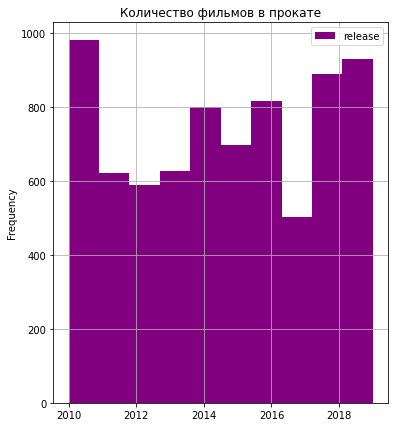

In [58]:
data.plot(kind = 'hist', y = 'release', grid = True, color = 'purple', title = 'Количество фильмов в прокате', figsize = (6,7))


In [59]:
#КОД РЕВЬЮЕРА
title_year_stat = data.groupby('release')[['title', 'box_office']].count()
title_year_stat['rate'] = title_year_stat['box_office'] / title_year_stat['title']
title_year_stat

,title,box_office,rate
release,,,
2010,979,101,0.10
2011,622,109,0.18
2012,588,123,0.21
2013,625,179,0.29
2014,800,272,0.34
2015,696,456,0.66
2016,814,522,0.64
2017,503,355,0.71
2018,887,471,0.53


<AxesSubplot:xlabel='release'>

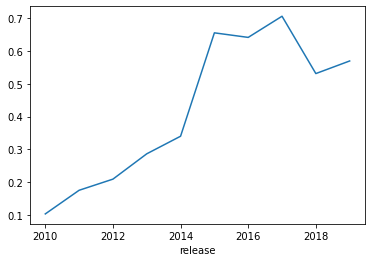

In [60]:
#КОД РЕВЬЮЕРА
title_year_stat['rate'].plot()

In [61]:
# Определяем долю фильмов с указанной информацией о прокате
# Предположим, под указанной информацией подразумивают информацию о кассовых сборах, тогда:

print('Объем известной информации относительно фильма в прокате равен:')
print((data[data['box_office']>0]['box_office'].count() / data['release'].count())*100, '%')
  


Объем известной информации относительно фильма в прокате равен:
41.878274889157595 %



Изучение изменений динамики проката по годам, год минимальной и максимальной суммы сборов

Год минимальной суммы сбора: 
 box_office    2010
dtype: int64
Год максимальной суммы сбора: 
 box_office    2018
dtype: int64


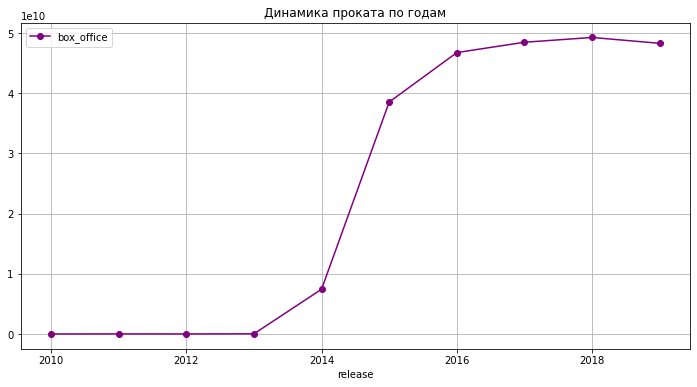

In [62]:
(data.pivot_table(index = 'release', values = 'box_office', aggfunc = 'sum')
.plot(title = 'Динамика проката по годам', style = 'o-', color = 'purple',figsize = (12,6), grid = True))

print('Год минимальной суммы сбора:','\n',data.pivot_table(index = 'release', values = 'box_office', aggfunc = 'sum').idxmin())
print('Год максимальной суммы сбора:','\n',data.pivot_table(index = 'release', values = 'box_office', aggfunc = 'sum').idxmax())

**Динамика видна, но что там с наличием информации по годам?**


<AxesSubplot:xlabel='release'>

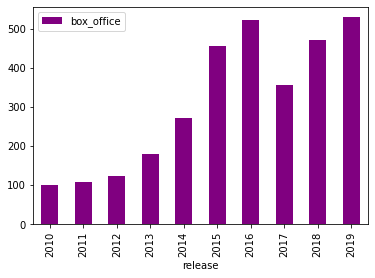

In [63]:
data.pivot_table(index = 'release', values ='box_office' , aggfunc ='count' ).plot(kind = 'bar', color = 'purple')

* **Минимальная сумма сбора может быть связана с отсутствием данных о сборах в 2010 году.**
* **C увеличением сумм сборов растёт и общее количество известной информации о сборах. При этом - количество фильмов в прокате 2010'ого года больше чем в другие года**

Средняя и медианная сумма сборов для каждого года

,mean,median
,box_office,box_office
release,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,333,521.48","20,310.00"
2015,"84,490,849.12","4,864,744.05"
2016,"89,544,667.18","3,777,202.68"
2017,"136,501,823.25","9,919,415.00"


<AxesSubplot:xlabel='release'>

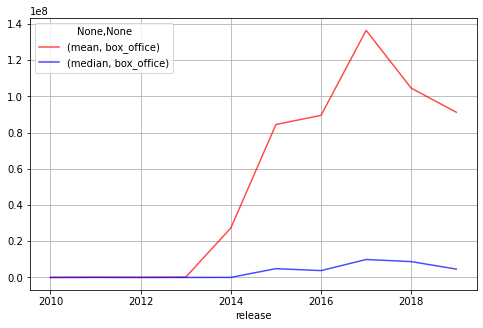

In [64]:
display(data.pivot_table(index = 'release', values = 'box_office', aggfunc = ['mean','median']))
(data.pivot_table(index = 'release', values = 'box_office', aggfunc = ['mean','median'])
 .plot(grid = True, color = ['red','blue'], alpha = 0.7, figsize = (8,5)))

**Закономерно - медиана менее чувствительна к малому числу кассовых рекордсменов**


Влияние возрастного ограничения на сборы фильма в прокате с 2015 по 2019 год:


     Средний объем сборов для фильмов по возрастному ограничению: 



age_restriction,0+,12+,16+,18+,6+
release,,,,,
2015,"9,975,120.48","189,007,177.05","65,741,467.08","41,453,058.24","163,794,458.08"
2016,"3,664,118.26","139,384,526.30","92,190,274.94","44,992,912.71","172,187,800.12"
2017,"76,532,976.67","191,498,235.63","155,788,257.93","65,656,432.52","273,432,593.89"
2018,"6,489,800.42","212,944,651.65","105,021,973.85","48,939,025.15","152,519,373.76"
2019,"5,915,355.61","149,178,809.10","71,648,421.26","55,310,362.31","158,811,772.80"


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


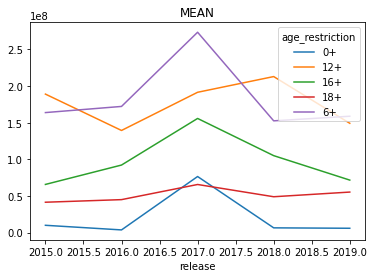

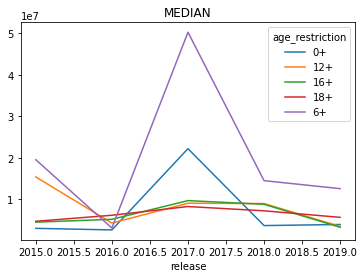

In [65]:
#Создадим новый датасет исключив года с явной нехваткой данных по сборам

new_data = data.query('release > 2014')
print('\n','    Средний объем сборов для фильмов по возрастному ограничению:', '\n')
display(new_data.pivot_table(index = 'release', columns = 'age_restriction', values = 'box_office'))

print(new_data.pivot_table(index = 'release', columns = 'age_restriction', values = 'box_office', aggfunc = 'mean').plot(title = 'MEAN')) 

print(new_data.pivot_table(index = 'release', columns = 'age_restriction', values = 'box_office', aggfunc = 'median').plot(title = 'MEDIAN'))



       Максимальные сборы среди фильмов по возрастным ограничениям 



age_restriction,0+,12+,16+,18+,6+
release,,,,,
2015,"158,025,089.10","1,658,861,425.50","1,486,131,019.00","1,006,737,153.00","1,646,580,645.70"
2016,"64,734,023.48","1,398,264,684.00","1,570,380,294.00","1,587,516,389.00","2,048,126,108.00"
2017,"206,478,186.00","1,655,037,688.00","2,118,396,119.00","1,036,725,434.00","2,779,686,144.00"
2018,"24,176,724.07","2,271,754,004.52","1,913,257,923.06","1,236,762,617.32","1,125,242,943.91"
2019,"13,779,632.32","3,073,568,690.79","2,576,613,776.83","1,890,368,076.47","1,911,944,865.95"


<AxesSubplot:xlabel='release'>

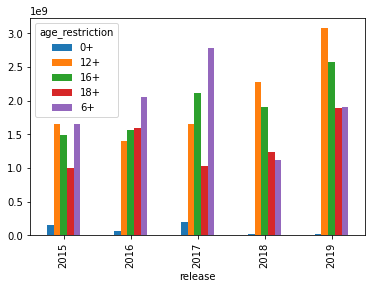

In [66]:
print('\n','      Максимальные сборы среди фильмов по возрастным ограничениям','\n')
display(new_data.pivot_table(index = 'release', columns = 'age_restriction', values = 'box_office', aggfunc = 'max'))

(new_data.pivot_table(index = 'release', columns = 'age_restriction', values = 'box_office', aggfunc = 'max')
       .plot(kind = 'bar'))

* **Возрастное ограничение( 0 - 6 - 12 ) положительно влияет на сборы фильма в прокате, вероятно из-за своего 'семейного' статуса, на данные картины приходит больше людей с детьм.** 

* **Наибольшие кассовые сборы в период с 2015 по 2019 год были среди фильмов с возратным ограничением(по убыванию сборов) 12 - 6 - 16 лет.**

* **В 2019 году наблюдается спад медианых сборов по фильмам во всех возрастных ограничениях. Может быть связано с кризисом на фоне пандемии. Обращаться к средним значениям сложно, т.к. они чувствительны к вбросам, которые тут не редкость.**

### 4. Исследование фильмов получивших государственную поддержку

In [67]:
print('Окупаемость общего дохода с общим бюджетом:')
print(data[data['budget'].notna() == True]['box_office'].sum()/data[data['box_office'].notna()== True]['budget'].sum())

Окупаемость общего дохода с общим бюджетом:
0.9693000683484233


* **Расход средств на кино превышает доход от него**

            box_office  deposit
box_office        1.00    -0.12
deposit          -0.12     1.00

            Корреляция вклада гос.бюджета и прокатного сбора фильма. 



<AxesSubplot:xlabel='box_office'>

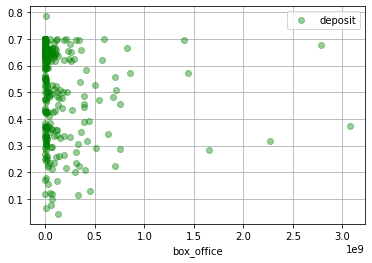

In [68]:
print(data.pivot_table(index = 'title', values = ['box_office','deposit']).corr())

print('\n','           Корреляция вклада гос.бюджета и прокатного сбора фильма.', '\n')
(data.pivot_table(index = 'box_office', values = 'deposit')
.plot(grid = True, style = 'o', color = 'green',alpha = 0.4))

**Кассовый сбор не зависит от того, какую долю бюджета покроет государство**

            box_office  budget
box_office        1.00    0.38
budget            0.38    1.00

            Корреляция бюджета и сборов. 



<AxesSubplot:xlabel='box_office'>

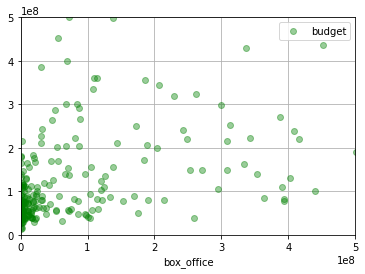

In [69]:
print(data.pivot_table(index = 'title', values = ['box_office','budget']).corr())

print('\n','           Корреляция бюджета и сборов.', '\n')
(data.pivot_table(index = 'box_office', values = 'budget')
.plot(grid = True, style = 'o', color = 'green',alpha = 0.4, xlim = (0, 500000000),ylim = (0,500000000)))

**Есть небольшая зависимость сборов от бюджета фильма. Больше -> Больше**

         budget  ratings
budget     1.00     0.10
ratings    0.10     1.00
           Корреляция бюджета и рейтинга. 



<AxesSubplot:xlabel='ratings'>

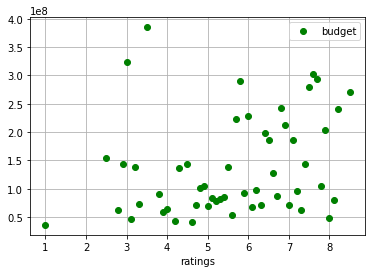

In [70]:

print(data.pivot_table(index = 'title', values = ['ratings','budget']).corr())
print('           Корреляция бюджета и рейтинга.', '\n')
(data.pivot_table(index = 'ratings', values = 'budget')
.plot(grid = True, style = 'o', color = 'green',alpha = 1))

**Рейтинг не взаимосвязан с бюджетом картины**

<AxesSubplot:title={'center':'Объем возвратной и невозвратной государственной помощи по жанрам:'}, xlabel='main_genre'>

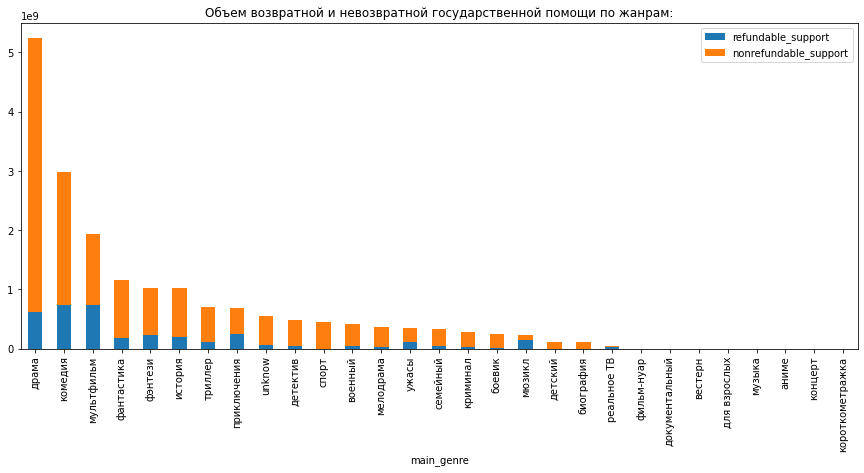

In [71]:
(data.groupby('main_genre').agg('sum').sort_values(by = 'all_support', ascending = False)
.plot(stacked=True,kind = 'bar', y = ['refundable_support', 'nonrefundable_support'], figsize = (15,6)
     ,title = 'Объем возвратной и невозвратной государственной помощи по жанрам:'))

**Государство чаще одобряет безвозвратную поддержку и больше всего было выделено для фильмов жанра - драма**

<AxesSubplot:title={'center':'Суммарная окупаемость вклада государственного бюджета по жанрам'}, xlabel='main_genre'>

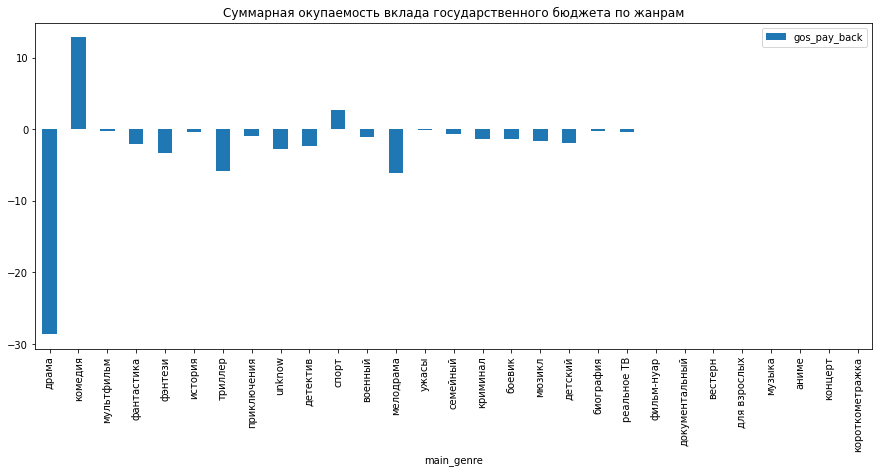

In [72]:
(data.groupby('main_genre').agg('sum').sort_values(by = 'all_support', ascending = False)
.plot(kind = 'bar' ,y = 'gos_pay_back', figsize = (15,6), title = 'Суммарная окупаемость вклада государственного бюджета по жанрам'))

* **Рентабельная общая окупаемость присуща всего двум жанрам: Комедия и Спорт.**
* **Драмы, получающие наибольшую поддержку от государства, являются самым убыточным жанром**

<AxesSubplot:title={'center':'Средняя и медианные окупаисмости гос.бюджета в фильмах по жанрам'}, xlabel='main_genre'>

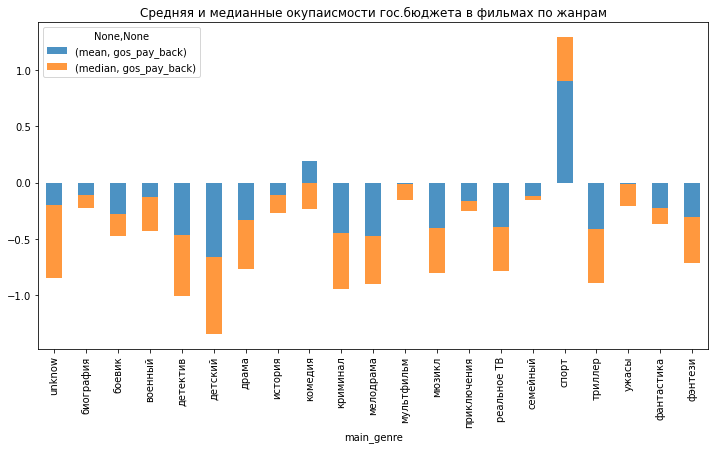

In [73]:

(data.pivot_table(index = 'main_genre', values = 'gos_pay_back', aggfunc = ['mean','median'])
.plot(kind = 'bar', figsize = (12,6), alpha = 0.8 ,stacked = True, title = 'Средняя и медианные окупаисмости гос.бюджета в фильмах по жанрам'))


* **Восновном, проекты профинансированные гос бюджетом - не окупаются**
* **Исключением являются фильмы жанра - Спорт. Медиана и среднее показывают сильное - положительное.**
* **Так же, стоит отметить фильмы в жанре - Комедия. Судя по медиане и среднему, кассовые сборы,порой, на высоте.**

<AxesSubplot:title={'center':'Количество фильмов в каждом жанре профинансированных гос.бюджетом'}, xlabel='main_genre'>

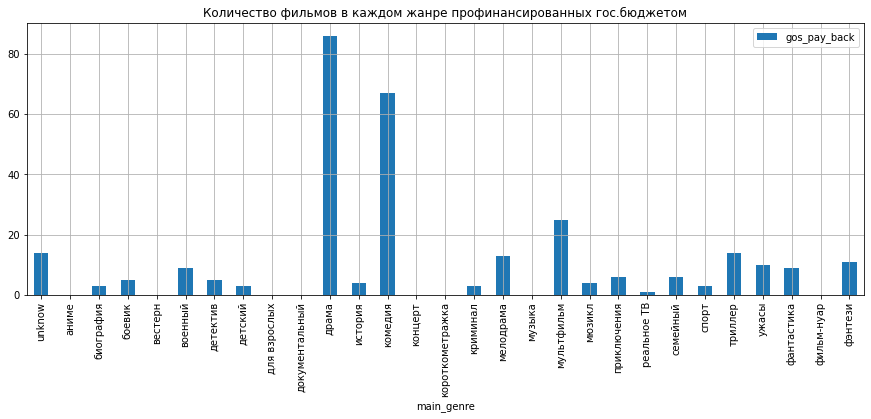

In [74]:
(data.pivot_table(index = 'main_genre', values = 'gos_pay_back', aggfunc = 'count')
 .plot(kind = 'bar', figsize = (15,5), title = 'Количество фильмов в каждом жанре профинансированных гос.бюджетом', grid = True))


* **Статистика выше показывала очень хорошую динамику у фильмов в жанре Спорт, однако, по общему количеству таких фильмов, сложно сказать о прямой закономерности.**
* **Комедии показывают себя более прогнозируемым жанром.**

<AxesSubplot:title={'center':'Рентабильность главных режисёров по окупаемости запрошенного гос.бюджета за всё время'}, xlabel='main_director'>

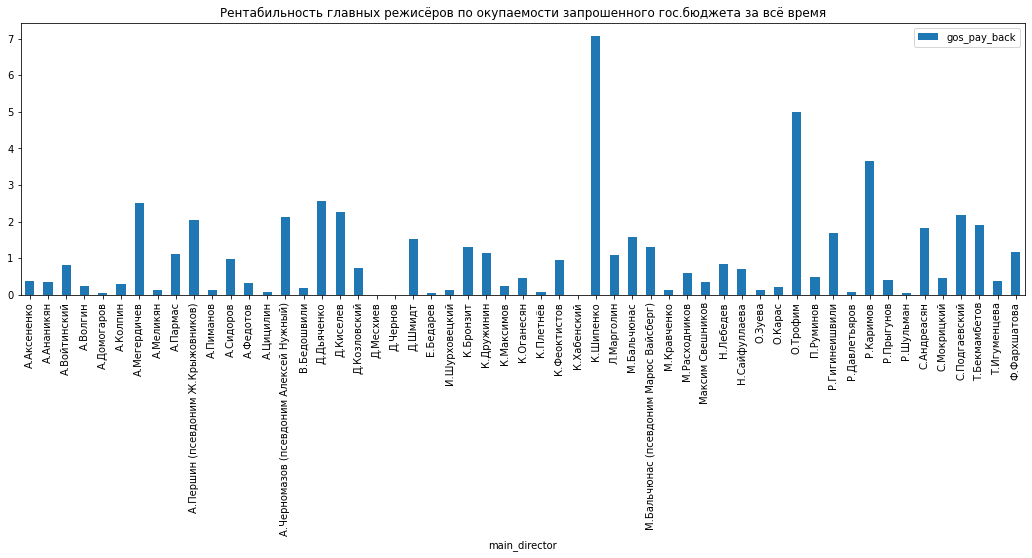

In [75]:
pivot_data = data.query('gos_pay_back > 0')
(pivot_data.pivot_table(index = 'main_director', values = 'gos_pay_back', aggfunc = 'sum')
 .plot(kind = 'bar', figsize = (18,5), 
       title = 'Рентабильность главных режисёров по окупаемости запрошенного гос.бюджета за всё время'))

* **Среди режесёров, которым выделяли средства из гос.бюджета есть выдающиеся**
* **К.Шипиенко; О.Трофим; Р.Каримов и др.**

<AxesSubplot:title={'center':'Рентабильность главных режисёров по медиане окупаемости запрошенного гос.бюджета'}, xlabel='main_director'>

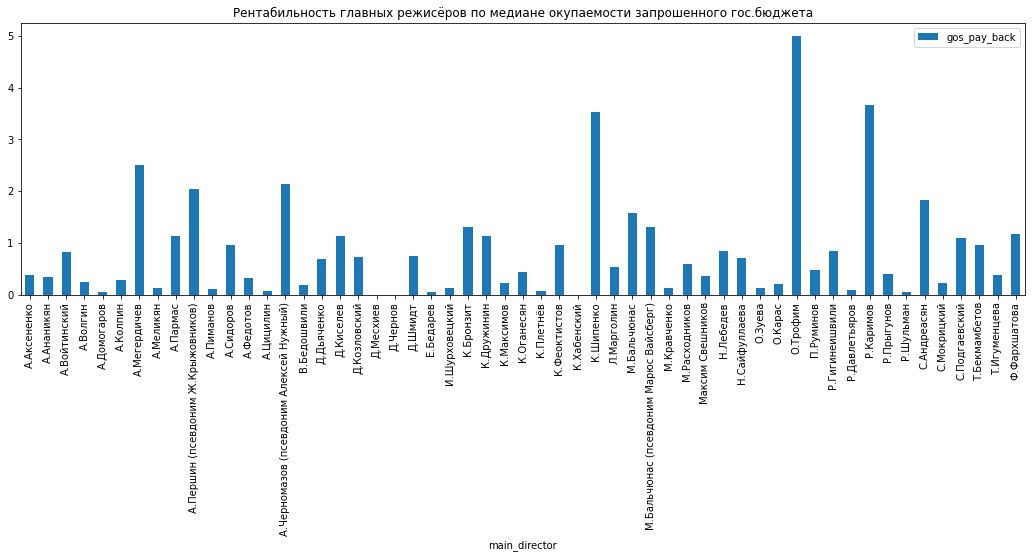

In [76]:
pivot_data = data.query('gos_pay_back > 0')
(pivot_data.pivot_table(index = 'main_director', values = 'gos_pay_back', aggfunc = 'median')
 .plot(kind = 'bar', figsize = (18,5), 
       title = 'Рентабильность главных режисёров по медиане окупаемости запрошенного гос.бюджета'))

* **Медианные сборы картин показывают похожие на общие результаты**

<AxesSubplot:xlabel='main_genre'>

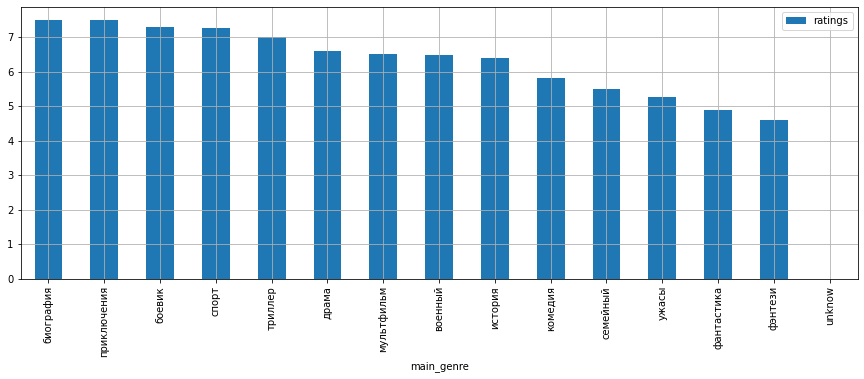

In [77]:
(pivot_data[['main_genre', 'ratings']].groupby('main_genre').agg('mean').sort_values(by = 'ratings', ascending = False)
 .plot(kind='bar', figsize = (15, 5), grid = True))

* **Наибольшие оценки для фильмов профинансированных гос.бюджетом получают боевики**
* **Хуже всего себя показывает жанр - фентези**

<AxesSubplot:xlabel='main_genre'>

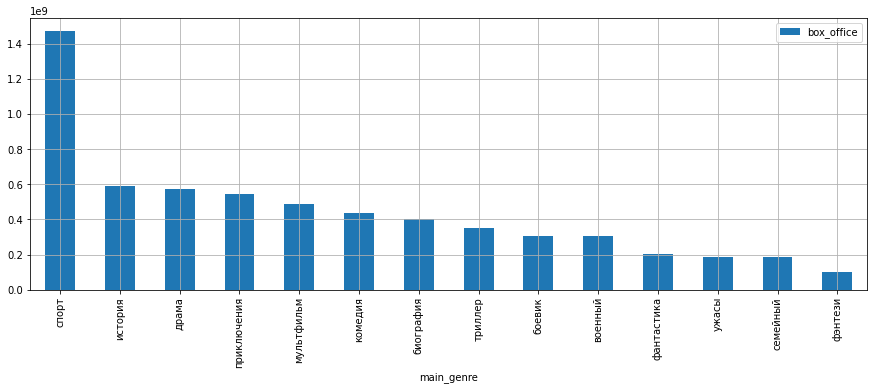

In [78]:
plot_data = pivot_data.query('main_genre != "unknow"')
(plot_data[['main_genre', 'box_office']].groupby('main_genre').agg('mean').sort_values(by = 'box_office', ascending = False)
 .plot(kind='bar', figsize = (15, 5), grid = True))

* **Самые большие, средние кассовые сборы среди финансируемых кино-картин уходят жанру спорт**
* **замыкает список фентези**

<AxesSubplot:xlabel='main_genre'>

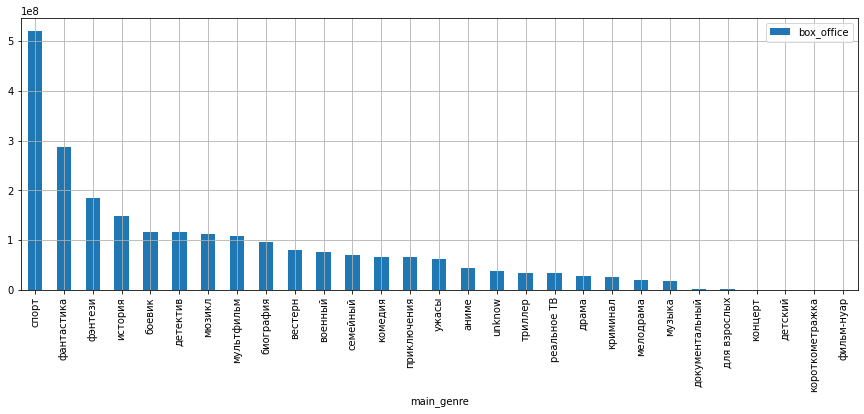

In [79]:
ru_film = data.query('box_office != 0')
(ru_film[['main_genre', 'box_office']].groupby('main_genre').agg('mean').sort_values(by = 'box_office', ascending = False)
 .plot(kind='bar', figsize = (15, 5), grid = True))

### 5. Общий вывод

# Итог запрошенного исследования

* По запросу Министерство культуры Российской Федерации был изучен российский рынок кинопроката и выявлены текущие тренды.

**Общие тренды:**
* В кино-картинах с возрастными ограничениями : 6+, 12+, 16+, заинтересовано большее количество зрителей в среднем, чем в картинах с другими возрастными ограничениями.
* Самым кассовым, а следовательно прибыльным, жанром стал "Спорт", почти в 2 раза опережая жанр "Фантастика" расположившийся на втором месте.
* Cтатистический спад кино-проката в 2019 году, относительно 2018 и 2017 года.


**Фильмы получающие государственную поддержку**
* Комедия - наиболее прогнозируемый и окупающийся жанр среди финансируемых из государственного бюджета.
* Спорт - наиболее окупающийся жанр из всех финансируемых ранее.
* Фильмы в остальных жанрах, в общем - не окупают вложенный на их создание бюджет.
* Фентези - оутсайдер по оценкам\окупаемости\сборам.

**Комментарий**
* Сомнительное качество статистических данных для Российских фильмов. Неверные значений рейтинга\жанра и, вероятно, другие проблемы.